In [49]:
using Glob
using DIVAnd
using NCDatasets
using GeoDatasets
using CairoMakie, GeoMakie
using JupyterFormatter
enable_autoformat()
include("./config.jl")

make_histogram (generic function with 1 method)

In [50]:
inch = 96
pt = 4 / 3
cm = inch / 2.54

37.79527559055118

## Read land-sea mask data

In [51]:
lon_landsea, lat_landsea, landsea = GeoDatasets.landseamask(; resolution = 'i', grid = 5)
landsea[landsea.==2] .= 1;

## Files and directories
Defined in the file `config.jl`

## Loop on the variables

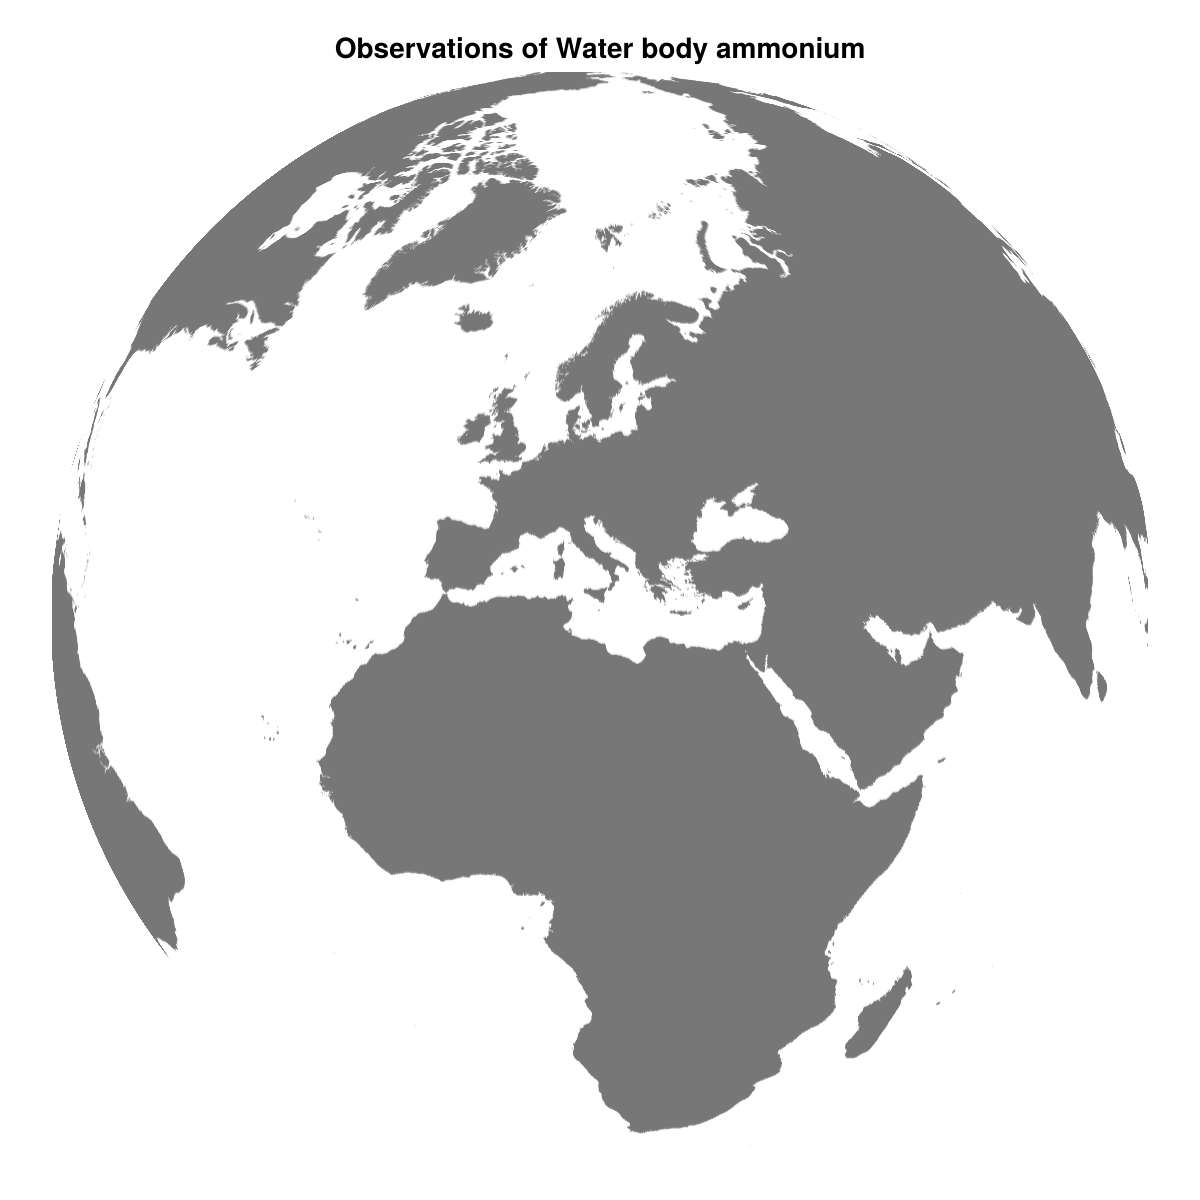

In [52]:
for varname in varlist[1:1]

    # Generate list of files (corresponding to this variable)
    datafilelist = sort(Glob.glob("*$(varname)*.nc", datadir))

    # Generate figure
    #fig0 = make_scatter(datafilelist, varname)
    #save(joinpath(figdir, "observations_$(varname).png"), fig0, px_per_unit = 300 / inch)

    # Hexbin plot
    fighex = make_hexbin(datafilelist, varname)
    display(fighex)
end

## Time series
We represent all the time series, whatever the variable.

[ Info: Found 4 files


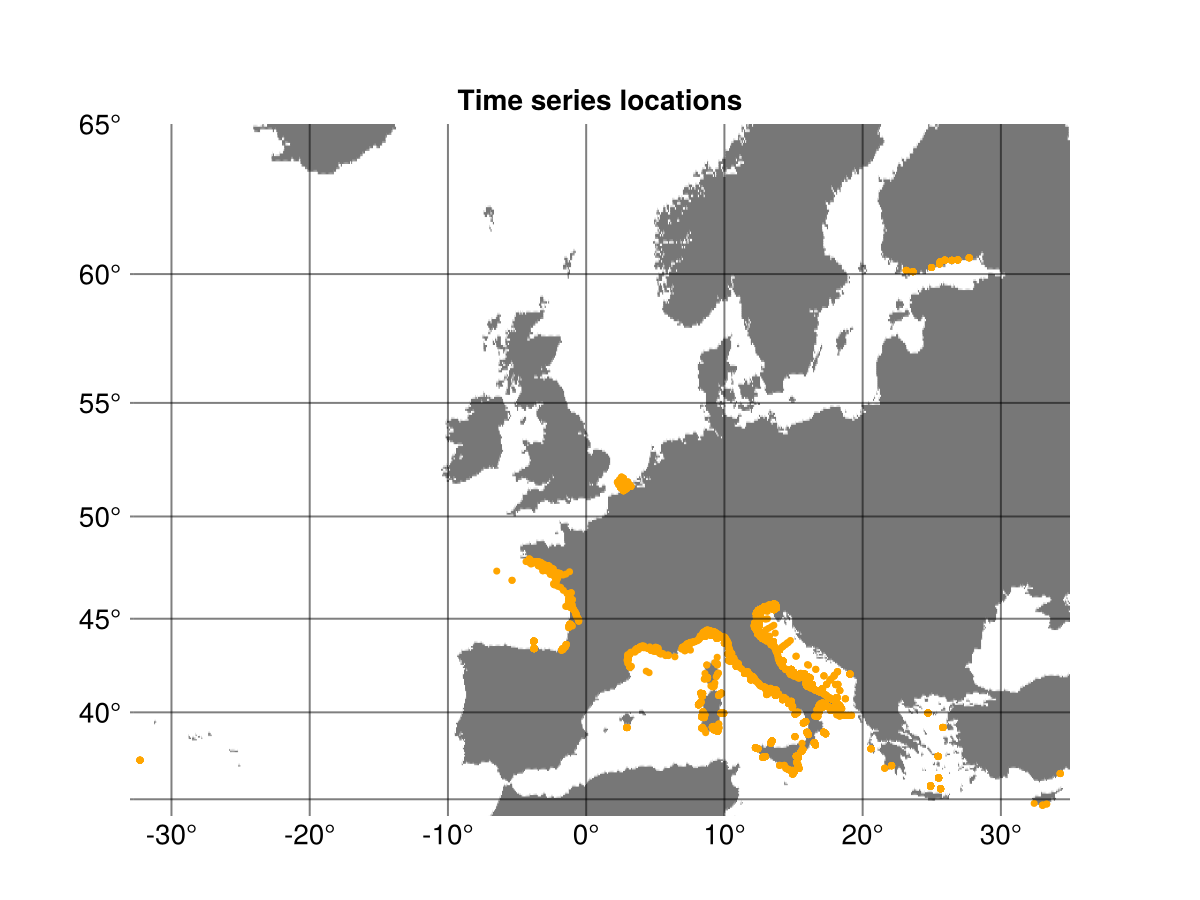

In [88]:
datadirTS = joinpath(datadir, "../ODVnetCDF")
datafilelistTS = Glob.glob("*timeseries*.nc", datadirTS)
@info("Found $(length(datafilelistTS)) files")

fig = Figure()
ga = GeoAxis(
    fig[1, 1],
    title = "Time series locations",
    dest = "+proj=merc",
    xticks = -40.0:10.0:40.0,
    yticks = 30.0:5.0:65,
    #dest = "+proj=ortho +lon_0=15 +lat_0=35",
)
heatmap!(
    ga,
    lon_landsea,
    lat_landsea,
    landsea,
    colormap = Reverse(:greys),
    colorrange = [0, 2],
)
#xlims!(-180, 180.0)
#ylims!(-90.0, 90.0)

obslon = Float64[]
obslat = Float64[]
for datafile in datafilelistTS
    NCDataset(datafile, "r") do nc
        append!(obslon, varbyattrib(nc, standard_name = "longitude")[1][:])
        append!(obslat, varbyattrib(nc, standard_name = "latitude")[1][:])

    end
end
plot!(ga, obslon, obslat, color = :orange, markersize = 5)
xlims!(ga, -33, 35)
ylims!(ga, 34.0, 65.0)
save(joinpath(figdir, "observations_timeseries.png"), fig, px_per_unit = 300 / inch)
fig